https://www.kaggle.com/code/georgyzubkov/mobile-price-eda-guide-to-using-optuna-with-svc?kernelSessionId=95943556

#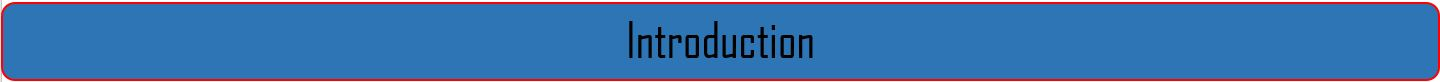

A mobile phone, cellular phone, cell phone, cellphone, handphone, hand phone or pocket phone, sometimes shortened to simply mobile, cell, or just phone, is a portable telephone that can make and receive calls over a radio frequency link while the user is moving within a telephone service area. The radio frequency link establishes a connection to the switching systems of a mobile phone operator, which provides access to the public switched telephone network (PSTN). Modern mobile telephone services use a cellular network architecture and, therefore, mobile telephones are called cellular telephones or cell phones in North America. In addition to telephony, digital mobile phones (2G) support a variety of other services, such as text messaging, MMS, email, Internet access, short-range wireless communications (infrared, Bluetooth), business applications, video games and digital photography. Mobile phones offering only those capabilities are known as feature phones; mobile phones which offer greatly advanced computing capabilities are referred to as smartphones.

The development of metal-oxide-semiconductor (MOS) large-scale integration (LSI) technology, information theory and cellular networking led to the development of affordable mobile communications. The first handheld mobile phone was demonstrated by John F. Mitchell and Martin Cooper of Motorola in New York City in 1973, using a handset weighing c. 2 kilograms (4.4 lbs). In 1979, Nippon Telegraph and Telephone (NTT) launched the world's first cellular network in Japan. In 1983, the DynaTAC 8000x was the first commercially available handheld mobile phone. From 1983 to 2014, worldwide mobile phone subscriptions grew to over seven billion; enough to provide one for every person on Earth. In the first quarter of 2016, the top smartphone developers worldwide were Samsung, Apple and Huawei; smartphone sales represented 78 percent of total mobile phone sales. For feature phones (slang: "dumbphones") as of 2016, the top-selling brands were Samsung, Nokia and Alcatel.

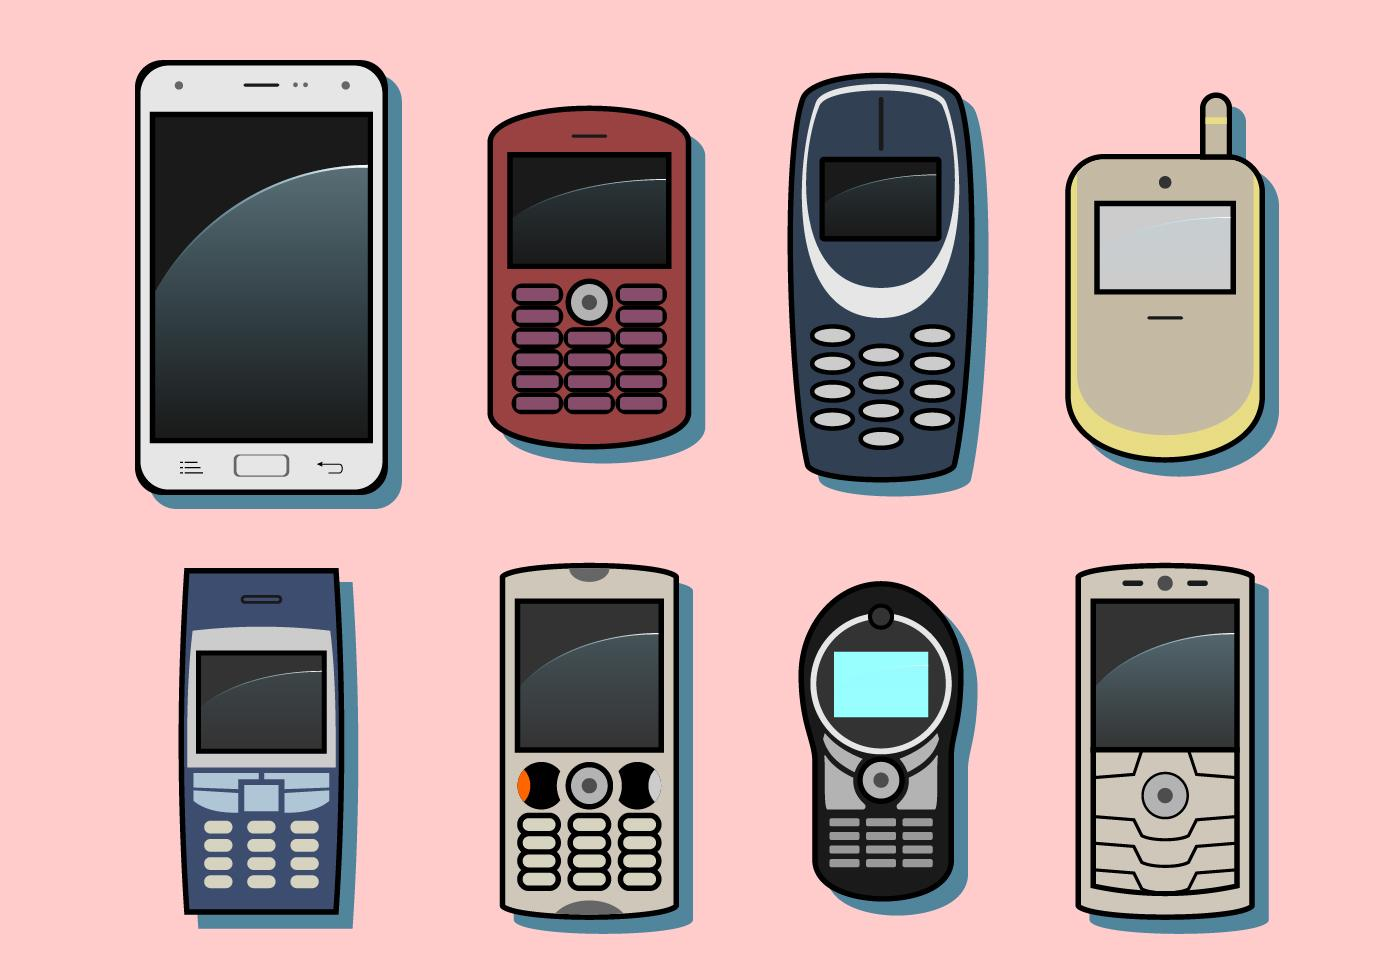

#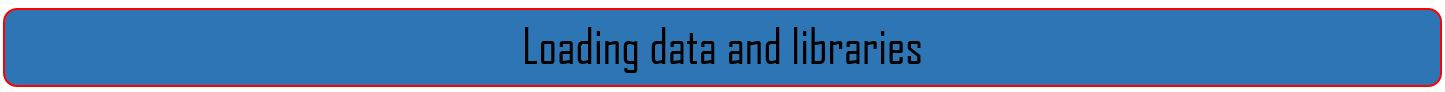

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

In [2]:
train = pd.read_csv('../input/mobile-price-classification/train.csv')

#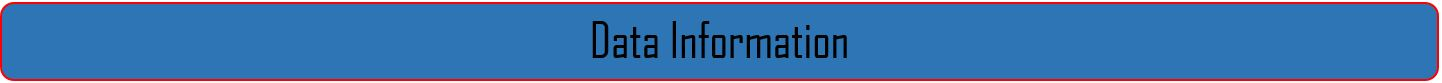

In [3]:
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


The dataset consists of 2000 rows and 21 columns.

Data information.

1.battery_power- phone battery capacity is the amount of electricity that a fully charged battery can deliver to a stand-alone device before it is completely discharged. Simply put, this indicator can give a rough idea of how long the phone will work on its own before it is completely discharged.

2.blue - the presence of bluetooth.Bluetooth is a short-range wireless technology standard that is used to exchange data between fixed and mobile devices over short distances using UHF radio waves in the ISM bands from 2.402 to 2.48 GHz and build personal area networks (PANs). It is mainly used as an alternative to wired connections, to share files between nearby portable devices, and to connect mobile phones and music.

3.clock_speed-speed at which microprocessor executes instructions.Clock speed is the number of operations that the processor performs per second. The higher it is, the more processor performance. The number of processor cores and cache size are also important. Now even the cheapest dual-core processors come with a frequency of 3.5 GHz - this is the level of a multimedia or gaming computer of the middle class. If this indicator is higher, the possibility of overclocking the processor and the number of cores also increase.

4.dual_sim-has dual sim support or not.The term Dual Sim in a phone or smartphone means support for two SIM cards, one of which you can use, for example, for personal calls, and the second for work. Many modern smartphones support two SIM cards.

5.fc-front camera mega pixels. The front camera is a camera that looks like a small eye, which is located on the front of the phone, in the same place where the sensors are installed (that is, at the top). Other manufacturers did not pay due attention to the characteristics of the front camera in the smartphone, as they hardly interested people. The front camera was used exclusively for making video calls.

6.four_g-has 4G or not. 4G  is a generation of mobile communications with increased requirements. It is customary to refer to the fourth generation as promising technologies that allow data transmission at a speed of up to 100 Mbps to mobile (with high mobility) and up to 1 Gbps to fixed subscribers (with low mobility).

7.int_memory-Internal Memory in Gigabytes. Internal Storage is a data storage on a smartphone where important data is found: the operating system (OS), installed applications, photos, videos, documents and other files.

8.m_dep-mobile Depth in cm.

9.mobile_wt-Weight of mobile phone.

10.n_cores-Number of cores of processor.The total number of cores in a single processor in an Android smartphone is typically eight (most iPhone upgrades have six). "The number of nuclear strikes on smartphone performance." big.LITTLE, in turn, stands for simply: there are cores that are more productive (large) and less productive (small).

11.pc-Primary Camera mega pixels. The number of megapixels of a camera sensor describes the image resolution that can be captured with this camera. For example, cameras with a 12 megapixel sensor can take photos with a resolution of 4200x2800 pixels, an 8 megapixel camera allows you to take pictures with a resolution of 3264x2468 pixels.

12.px_height-Pixel Resolution Height.

13.px_width-Pixel Resolution Width.

14.ram-Random Access Memory in Megabytes.Random Access Memory (RAM) is the link between the processor and the playback system because it contains temporary information necessary for running applications to run.

15.sc_h-Screen Height of mobile in cm.

16.sc_w-Screen Width of mobile in cm.

17.talk_time-longest time that a single battery charge.

18.three_g-has 3G or not.Mobile communication of the third generation is built on the basis of packet data transmission. Networks of the third generation 3G operate on the border of decimeter and connected to the network. They allow you to organize videotelephony, watch movies and individual content on your mobile phone.

19.touch_screen-has touchscreen or not. A touchscreen, in fact, is a touch glass that works according to a simple scheme: touching the observer allows you to realize any functions or symptoms of exposure.

20.wifi-has wifi or not. Wi-Fi is a wireless networking technology that allows devices such as computers (laptops and desktops), mobile devices (smartphones and wearables), and other equipment (printers and camcorders) to access the Internet.

21.price_range
This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Hypothesis: most of the features are categorical. We will check it during the EDA.

#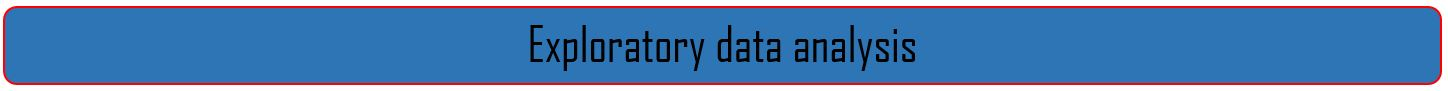

Define dataset statistics

In [5]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Hypothesis: features of weight, dimensions of the phone are continuous

Let's look at the missing values in the data

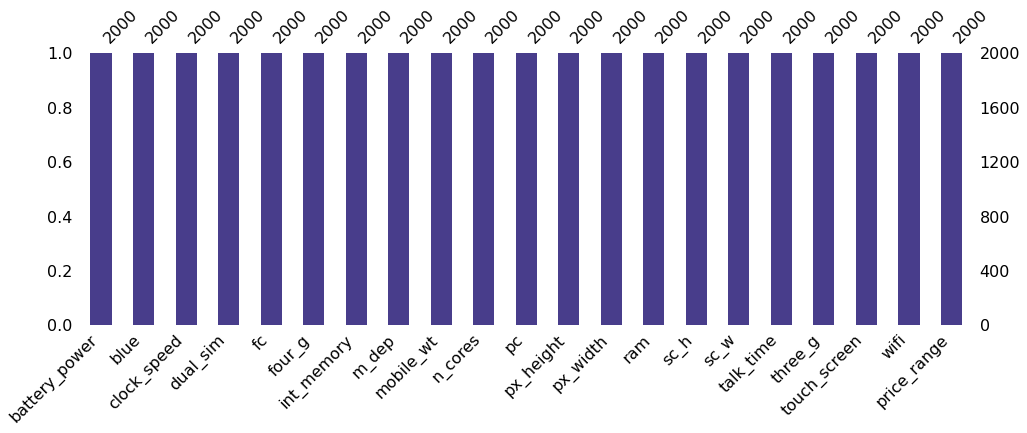

In [6]:
msno.bar(train, figsize = (16,5),color = "#483D8B")
plt.show()

There are no missing values.

Let's look at the number of unique values in variables and draw final conclusions about the type of variables.

In [7]:
for column_name in train.columns:
    unique_values = len(train[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                                         unique_values=unique_values))

Feature 'battery_power' has '1094' unique values
Feature 'blue' has '2' unique values
Feature 'clock_speed' has '26' unique values
Feature 'dual_sim' has '2' unique values
Feature 'fc' has '20' unique values
Feature 'four_g' has '2' unique values
Feature 'int_memory' has '63' unique values
Feature 'm_dep' has '10' unique values
Feature 'mobile_wt' has '121' unique values
Feature 'n_cores' has '8' unique values
Feature 'pc' has '21' unique values
Feature 'px_height' has '1137' unique values
Feature 'px_width' has '1109' unique values
Feature 'ram' has '1562' unique values
Feature 'sc_h' has '15' unique values
Feature 'sc_w' has '19' unique values
Feature 'talk_time' has '19' unique values
Feature 'three_g' has '2' unique values
Feature 'touch_screen' has '2' unique values
Feature 'wifi' has '2' unique values
Feature 'price_range' has '4' unique values


We will divide the variables into categorical and continuous, analyze them and draw conclusions.

In [8]:
cat_features=list()
num_features=list()
for column_name in train.columns:
    unique_values = len(train[column_name].unique())
    if unique_values<30:
      cat_features.append(column_name)
    else:
      num_features.append(column_name)

In [9]:
cat_features

['blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'm_dep',
 'n_cores',
 'pc',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [10]:
num_features

['battery_power', 'int_memory', 'mobile_wt', 'px_height', 'px_width', 'ram']

Let's start with an analysis of categorical features

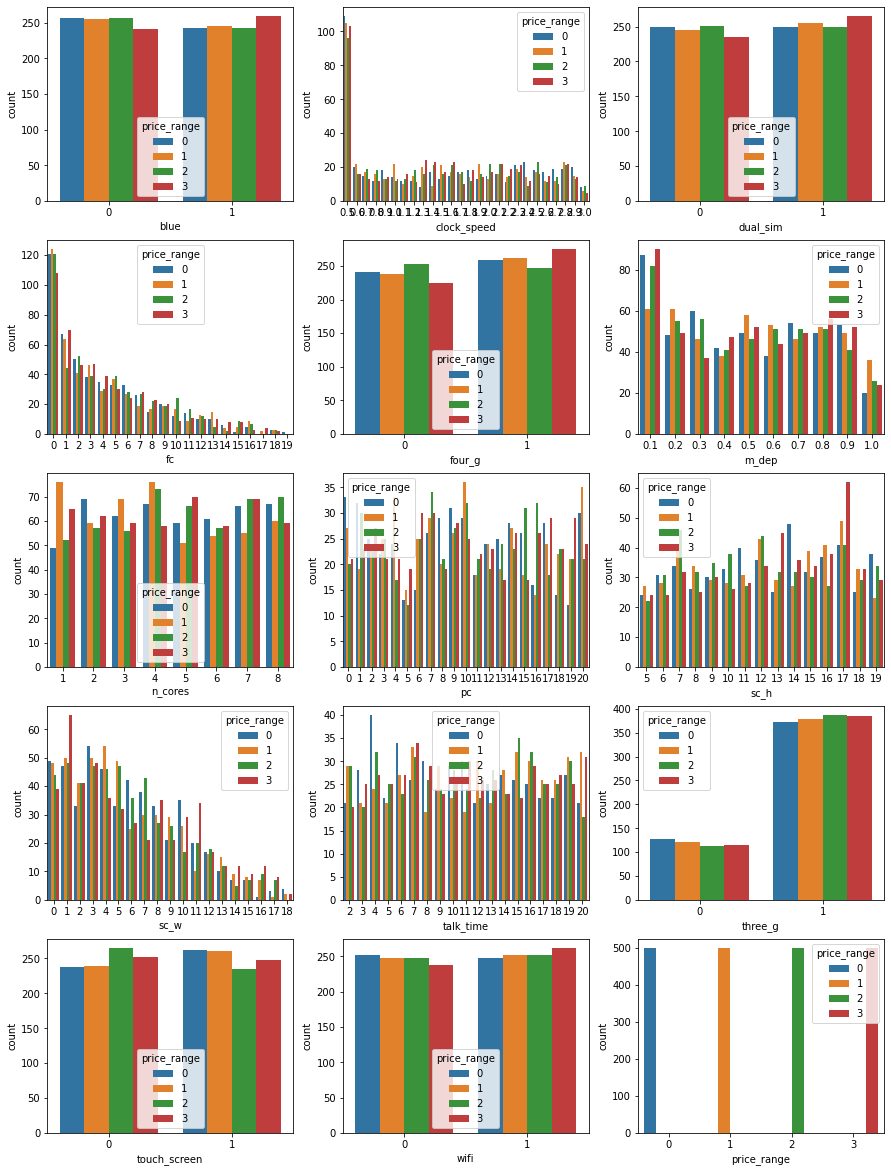

In [11]:
i = 1
plt.figure(figsize = (15,25))
for feature in cat_features:
    plt.subplot(6,3,i)
    sns.countplot(x = feature , data = train,hue='price_range')
    i +=1

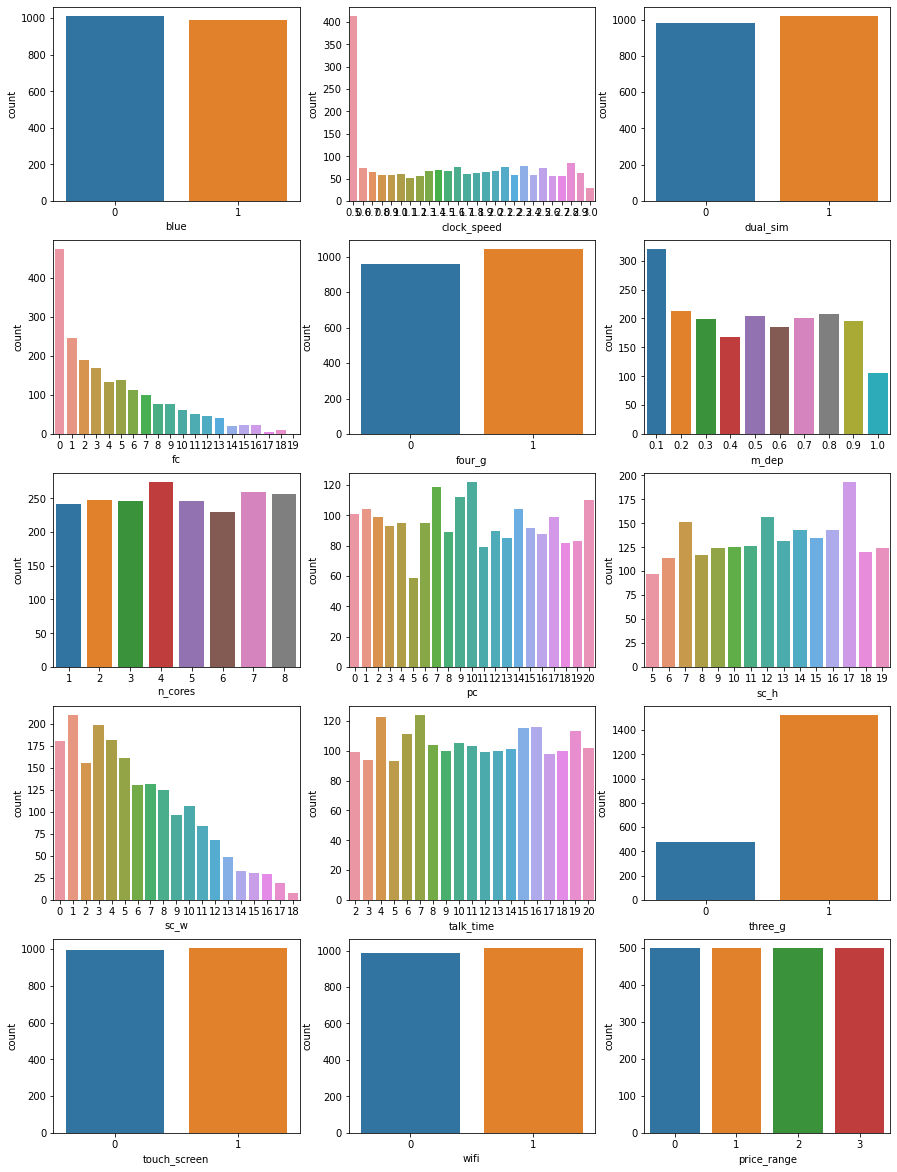

In [12]:
i = 1
plt.figure(figsize = (15,25))
for feature in cat_features:
    plt.subplot(6,3,i)
    sns.countplot(x = feature , data = train)
    i +=1

Conclusions from the charts:
* samples are balanced with respect to the distribution of categorical features
* there is an imbalance of phones equipped with 3g
* with an increase in the quality of the front camera, the number of models presented decreases

Let us analyze continuous variables

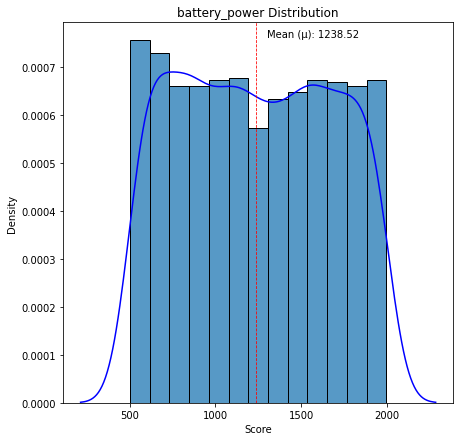

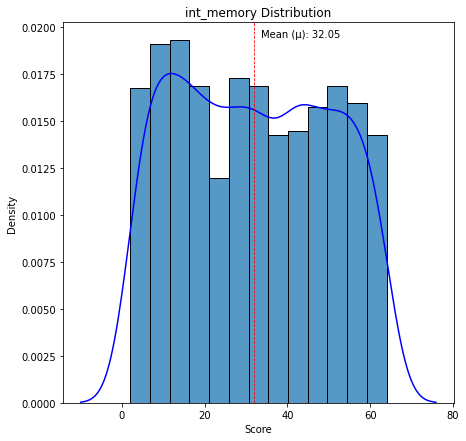

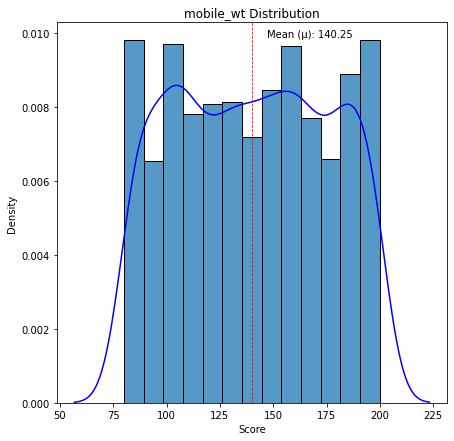

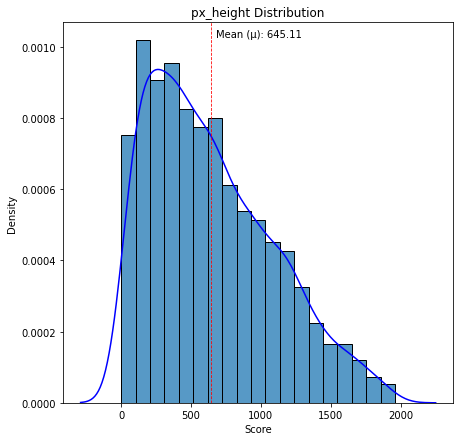

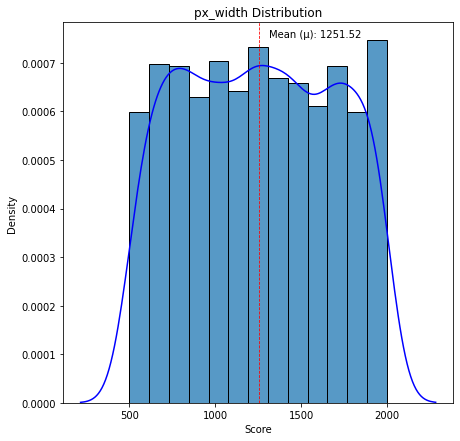

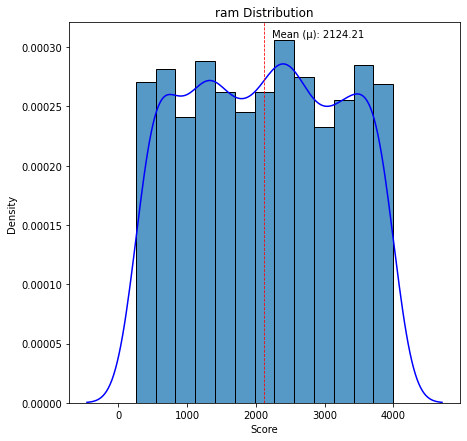

In [13]:
for column_name in num_features:
  plt.figure(figsize=(7, 7))
  plt.title("{column_name} Distribution".format(column_name = column_name))
  sns.histplot(train[column_name], stat='density')
  sns.kdeplot(train[column_name], color='blue')
  plt.axvline(train[column_name].mean(), color='red', linestyle='--', linewidth=0.8)
  min_ylim, max_ylim = plt.ylim()
  plt.text(train[column_name].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(train[column_name].mean()))
  plt.xlabel("Score")
  plt.ylabel("Density")
  plt.show()

There are approximately the same number of different phones according to the given parameters, except for the height of the phone, as a rule, with an increase in the size of the phone, the number of such phones decreases, therefore phones with medium sizes are in great demand.

Let's analyze continuous variables for outliers.

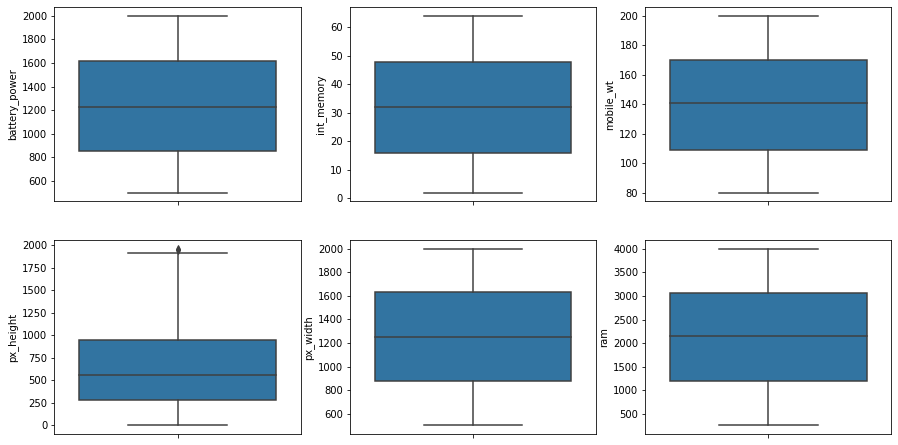

In [30]:
i=1
plt.figure(figsize=(15,25))
for feature in num_features:
    plt.subplot(6,3,i)
    sns.boxplot(y=train[feature])
    i+=1

There are small emissions in the weight of the phone, we will leave everything unchanged.

Let's carry out a correlation analysis

In [14]:
correlation = train.corr()
print(correlation['price_range'].sort_values(ascending = False),'\n')

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64 



Index(['price_range', 'ram', 'battery_power', 'px_width', 'px_height',
       'int_memory', 'sc_w', 'pc', 'three_g', 'sc_h'],
      dtype='object')


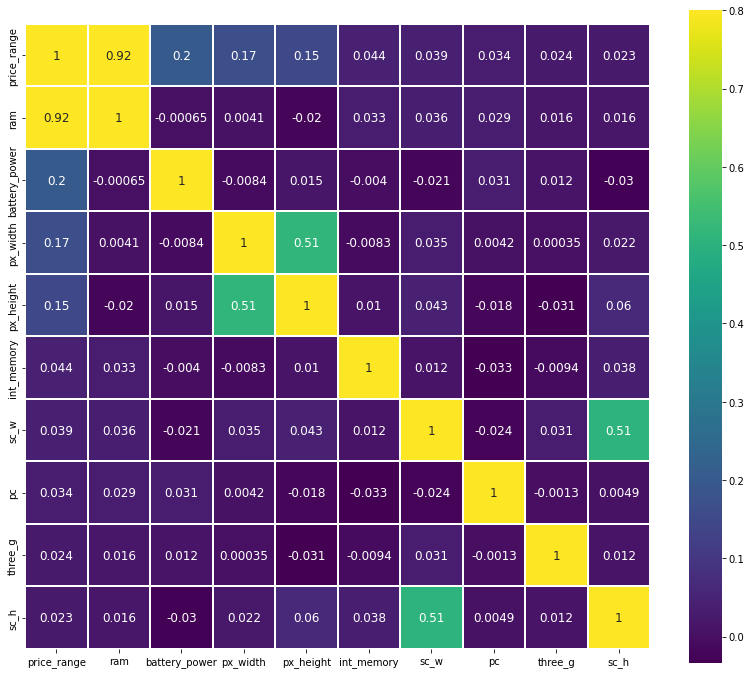

In [15]:
k= 10
cols = correlation.nlargest(k,'price_range')['price_range'].index
print(cols)
cm = np.corrcoef(train[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)
plt.show()

There is a strong correlation between storage capacity and price category, as well as between phone sizes. Therefore, we can conclude that with an increase in the amount of memory of the phone, its cost will also increase.

Because Since we are not faced with the task of improving the quality of the model, it makes no sense to encode variables. As a rule, if a categorical feature has less than 5 features, then it makes sense to encode it using the OneHotEncoding method, while the rest of the features can be encoded with OrdinalEncoding. Also for quantitative variables, scaling within the boundaries of [0,1] can be carried out. This process will hypothetically improve the model from 1 to 5%.

#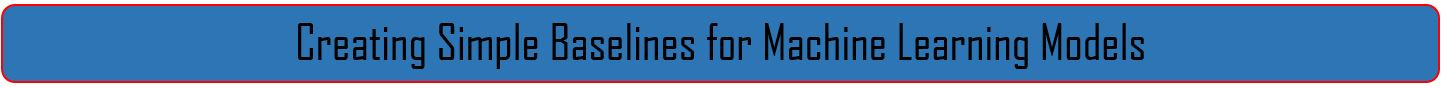

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb

from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

In [17]:
X=train.drop('price_range',axis=1)
y=train['price_range']

In [18]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Let's build pipelines of ml models

In [19]:
models = [RandomForestClassifier(), KNeighborsClassifier(), SVC(), LogisticRegression(),xgb.XGBClassifier()]
scores = dict()

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(classification_report(y_test,y_pred, zero_division=1))
    print('-'*30, '\n')

model: RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.84      0.85      0.84        91
           2       0.78      0.82      0.80        92
           3       0.94      0.88      0.91       112

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400

------------------------------ 

model: KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       105
           1       0.92      0.93      0.93        91
           2       0.89      0.91      0.90        92
           3       0.97      0.94      0.95       112

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400

------------------------------ 

mo

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


model: LogisticRegression()
              precision    recall  f1-score   support

           0       0.82      0.75      0.79       105
           1       0.52      0.51      0.51        91
           2       0.48      0.50      0.49        92
           3       0.69      0.73      0.71       112

    accuracy                           0.63       400
   macro avg       0.63      0.62      0.62       400
weighted avg       0.64      0.63      0.63       400

------------------------------ 

model: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weigh

The support vector machine showed the best accuracy among the other models. There was a hypothesis about overfitting our model, this hypothesis should be tested by finding the optimal hyperparameters on cross-validation using the Optuna library.

#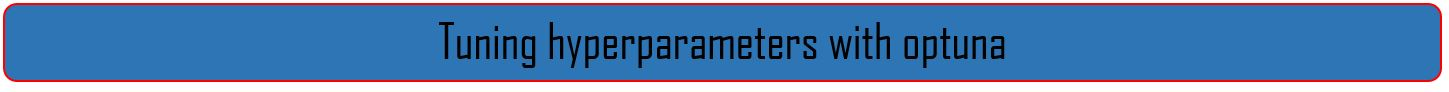

In [20]:
!pip install optuna

In [21]:
import optuna 
from optuna import Trial, visualization
from optuna.samplers import TPESampler
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

We should check the k-nearest neighbors algorithm, because it has a large variability in hyperparameter changes.

In [22]:
def objective(trial: Trial,X,y) -> float:
    
    param = {
            'n_neighbors' : trial.suggest_int("n_neighbors",3,30),
            'weights' : trial.suggest_categorical("weights",['uniform', 'distance']),
            'algorithm' : trial.suggest_categorical("algorithm",['auto', 'ball_tree', 'kd_tree', 'brute']),
            'leaf_size' : trial.suggest_int("leaf_size",10,50),
            'p' : trial.suggest_int("p",1,2)
            }
    
    model = KNeighborsClassifier(**param)
    
    return cross_val_score(model, X, y, cv=5).mean()

In [23]:
#study = optuna.create_study(direction='maximize',sampler=TPESampler())
#study.optimize(lambda trial : objective(trial,X_train,y_train),n_trials= 50)

Let's check the support vector algorithm. Because it has a small number of hyperparameters for tuning, then the improvement in the quality of the model on cross-validation is expected to be small

In [24]:
def objective(trial: Trial,X,y) -> float:
    
    param = {
            'kernel' : trial.suggest_categorical("kernel",['linear', 'poly']),
            'gamma' : trial.suggest_float("gamma",0.001,0.99)
            }
    
    model = SVC(**param)
    
    return cross_val_score(model, X, y, cv=5).mean()

In [25]:
#study = optuna.create_study(direction='maximize',sampler=TPESampler())
#study.optimize(lambda trial : objective(trial,X_train,y_train),n_trials= 5)

In [26]:
#print('Best trial: score {},\nparams {}'.format(study.best_trial.value,study.best_trial.params))

In [27]:
clf=SVC()
parametres={'kernel': ['linear'], 'gamma': [0.9410324779075709]}
grid_search_cv_clf=GridSearchCV(clf,parametres,cv=5)
grid_search_cv_clf.fit(X_train,y_train)
best_clf2=grid_search_cv_clf.best_estimator_
y_pred2=best_clf2.predict(X_test)
print(classification_report(y_test,y_pred2, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       105
           1       0.91      1.00      0.95        91
           2       0.99      0.95      0.97        92
           3       0.98      0.99      0.99       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



Build the error matrix and evaluate the performance of the algorithm.

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

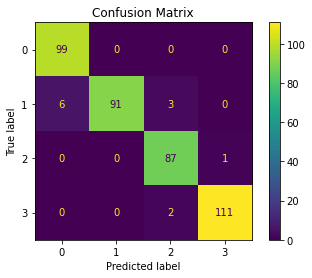

In [29]:
cm = confusion_matrix(best_clf2.predict(X_test),y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["0","1","2","3"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

The forecasting carried out showed that the support vector machine copes with its task very well. It has been suggested that this is due to the presence of a memory variable that has a very strong correlation with the target feature.

#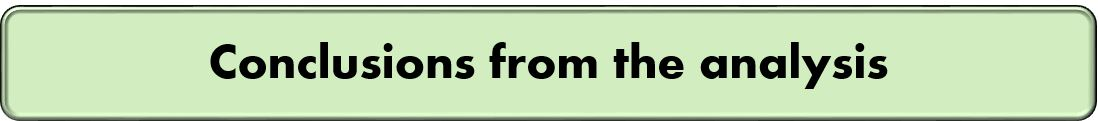

Recommendations for choosing and purchasing a mobile phone:
* Start choosing a smartphone with a budget - determine the maximum.
* Operating system. With operating systems, everything is simple and complex at the same time. The simplicity is that there are only two of them - iOS and Android. The difficulty is that iOS is always quite expensive, and Android is a whole zoo of branded system shells: Samsung, Huawei, Xiaomi, Sony and other Android smartphone manufacturers see this system in their own way. The functionality is identical, but the "wrapper" can be very different.
* Screen diagonal. In more expensive devices, screens with minimal bezels can reduce the size of the case. In budget solutions, the frames are large, so the influence of the diagonal on the dimensions of the smartphone is more critical. Finding both a powerful and compact device is really difficult. If the size is really important to you, then it is better to twist the gadget in the store in your hands before buying. Smartphones with a diagonal of less than 5.4 inches are always among the most budget segment.
* Smartphone material. In any case, the screen will be glass, it remains to choose the case and its back, which can be all-metal or mixed - the frame is metal or plastic, and the back is plastic or glass. Which is better is a philosophical question. The metal seems to be premium, but the smartphone is heavier due to this, and in the cold it makes your hands cold. Plastic is lighter, but will crack on impact. At the same time, a cracked plastic backdrop is much easier and cheaper to replace than a glass one. It is also worth paying attention to the color and surface.
* Maintainability. A rare, outdated or very unpopular smartphone is a guaranteed repair problem: the services may not have spare parts. A similar story with the purchase of flagships in the first days of release: if you break the screen, you will have to walk for several months until new modules are brought to the services for replacement. And of course it will be expensive. In general, the rule “more expensive smartphone - more expensive repairs” works. Also be wary of moving parts: folding smartphones with flexible screens and retractable front cameras.
* Matrix. If you see the abbreviation TN, then you do not need such a smartphone: the colors will be terrible, the brightness will be low, and the viewing angles will be very narrow. You need to choose smartphones with OLED (Samsung has AMOLED) and IPS with different variations.
* Screen resolution affects the level of detail and clarity of the picture. Therefore, I strongly do not recommend looking at a resolution less than Full HD (1920 × 1080 pixels). For large diagonals from 6.2 inches and above, you can focus on 2.5K (2560 × 1440 pixels). It is important to understand that the higher the screen resolution, the more energy it will consume. Thoughtlessly chasing fashionable 4K (4096 × 3072) or something close, most likely, is not necessary at all. You will lose a lot in autonomy, pay a lot, and the visual difference with the same 2.5K will be small.
* In expensive smartphones, screens with a refresh rate increased from 60 to 120+ Hz are being actively introduced. This increases the smoothness (and the cost of the device), while reducing autonomy. The function is interesting, but it does not radically change the user experience. I'm sure you can save money on this.
* SIM card. If you use more than one SIM card, then buy a smartphone with support for two cards. Their format is not important - you can always ask in the operator's cabin to replace the microSIM with a more modern nanoSIM standard - this is a matter of 5 minutes. But remember that the use of two SIM-cards in a smartphone significantly increases energy consumption.
* The Bluetooth version is important if you actively use wireless headphones and speakers: choose a version of at least 5.0, and preferably 5.1 or 5.2. The last two standards have gone far ahead in terms of energy savings and signal stability. And BT 4.1 and 4.2, which can still be found in smartphones, are obsolete versions of 2014 and 2016.
* Support for 5G networks. It is not yet available in budget solutions, but there are already suitable flagships on the market. Alas, in Russia the rate of deployment of fifth generation networks is still low, and it is difficult to say whether something will change in the next two or three years.
* Processor. The fact is that their power is on average so high that almost any solves the vast majority of tasks. At the same time, the power and price of chips are growing, and there are no new tasks that would involve it. With Android, there are chances to get a little confused: it seems that choosing between all these Qualcomm, MediaTek, Kirin and other Exynos is difficult, but in reality everything is relatively simple. The American Qualcomm is considered a premium manufacturer and generally leads the market, Kirin - Huawei's own chips, MediaTek - economical China, Exynos - Samsung. And within each line there are cheap, medium and expensive solutions.
*Random access memory (RAM): the more it is, the better - a large amount of RAM allows the gadget to cope with a large number of simultaneous calculations. If you have ever opened 20-30 tabs in the browser of a budget smartphone, then you understand what we are talking about: switching between them becomes.

# Thanks for viewing my kernel! Rate and leave comments on the work that you would like to explore and add to my work!